In [55]:
#a lesson in toy problems and design thinking concepts...

import datetime
import importlib
import pickle
import scipy.stats

import numpy as np  

from pd_funcs import demo_funcs
from astropy.time import Time

importlib.reload(demo_funcs)

<module 'pd_funcs.demo_funcs' from 'D:\\SIM_Teach\\Jan_14_class\\pd_funcs\\demo_funcs.py'>

In [31]:
data_artifact_a = [{'2015-03-05_nameA': [[1, -5, -3],
   [0.8, 0.7, 0.4],
   [5, 2, 8],
   [0.1, 0.2, 0.3]]},
 {'2011-05-08_nameB': [[-3, 1, -4],
   [0.1, 0.7, 0.3],
   [1, 4, 2],
   [0.1, 0.1, 0.3]]},
 {'2019-11-18_nameC': [[1, -1, 3],
   [0.2, 0.5, 0.4],
   [-1, 4, 6],
   [0.2, 0.8, 0.2]]},
 {'2014-03-12_nameD': [[0, 2, 5],
   [0.9, 0.6, 0.6],
   [-2, 0, 1],
   [0.6, 0.5, 0.6]]}]

In [29]:
filenamea='1ddata_a.pickle'
filenameab='1ddata_ab.pickle'

data_artifact_a = demo_funcs.data_loader(filenamea)
data_artifact_ab = demo_funcs.data_loader(filenameab)

In [30]:
data_artifact_a

[{'2015-03-05_nameA': [[1, -5, -3],
   [0.8, 0.7, 0.4],
   [5, 2, 8],
   [0.1, 0.2, 0.3]]},
 {'2011-05-08_nameB': [[-3, 1, -4],
   [0.1, 0.7, 0.3],
   [1, 4, 2],
   [0.1, 0.1, 0.3]]},
 {'2019-11-18_nameC': [[1, -1, 3],
   [0.2, 0.5, 0.4],
   [-1, 4, 6],
   [0.2, 0.8, 0.2]]},
 {'2014-03-12_nameD': [[0, 2, 5],
   [0.9, 0.6, 0.6],
   [-2, 0, 1],
   [0.6, 0.5, 0.6]]}]

In [22]:
data_artifact_ab

[{'2009-08-15_nameD': [[-1, 1, -4],
   [0.4, 0.1, 0.2],
   [4, 2, 4],
   [0.4, 0.7, 0.1]]},
 {'2005-12-07_nameE': [[5, 4, -1],
   [0.8, 0.7, 0.9],
   [1, 3, 0],
   [0.9, 0.6, 0.3]]},
 {'2001-03-22_nameF': [[-3, 2, 4],
   [0.2, 0.5, 0.4],
   [-3, -4, 1],
   [0.2, 0.8, 0.2]]}]

In [4]:
print("Length:", len(data_artifact_a))#This can be variable

#When we talk about having standardised structure for lists it should have some
#features we want such as:
#We can add to this, subtract(delete) data from it, slice it. Check its order 

Length: 4


In [5]:
#We can add
data_artifact_a=data_artifact_a+data_artifact_ab
print(len(data_artifact_a))

#This wont work
#data_artifact_a.append(data_artifact_ab)

7


In [6]:
#We can subtract
del(data_artifact_a[6])
print(len(data_artifact_a))

6


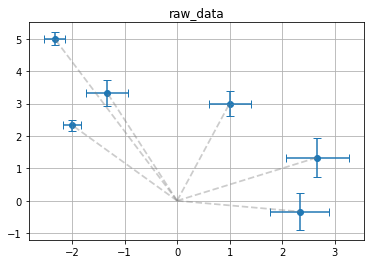

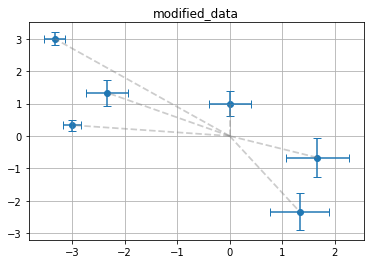

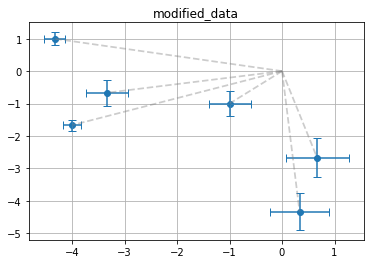

In [16]:
#Suppose we design some finctions function surrounding this data artefact

#One to plot
demo_funcs.demo_plot(data_artifact_a, 
                     title = 'raw_data',
                     verbose_data=False, 
                     mag_line=True)

#One to make a computation on the artifact
#We can show that the original data artefact can be changed if we do not do the copying
mod_artifact = demo_funcs.demo_comp(data_artifact_a, [1, 2])

#One to plot
demo_funcs.demo_plot(mod_artifact, 
                     title = 'modified_data',
                     verbose_data=False, 
                     mag_line=True)

#We can even cascade it further 
mod_artifact_b = demo_funcs.demo_comp(mod_artifact, [1, 2])

#One to plot
demo_funcs.demo_plot(mod_artifact_b, 
                     title = 'modified_data',
                     verbose_data=False, 
                     mag_line=True)

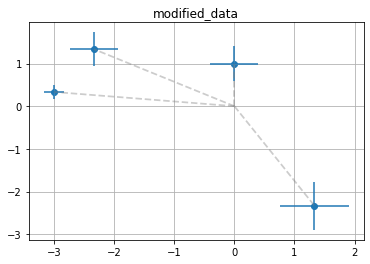

In [11]:
#We can slice which is useful
#One to plot
demo_funcs.demo_plot(mod_artifact[1:-1], 
                     title = 'modified_data',
                     verbose_data=False, 
                     mag_line=True)

In [42]:
#Now suppose a requirement came up that requires the artifact to be modified increasing it to 2D. 
#It could be anything. More data... Meta data. 
#
#
#For some reason you have to accomodate this 2D data structure in your data processing functions
#How ould we write those modifications? How do you modify the functions to 
#take this
#

In [38]:
#Then you have a new data artifact build on top of the first one
data_artifact_2da = ([{'2015-03-05_nameA': [[1,-5,-6],
                                        [.6,.7,.8],
                                        [5,2,-1],
                                        [.4,.6,.7]]},
                   {'2011-05-08_nameB':[[-3,4,-2],
                                        [.8,.7,.5],
                                        [-5,2,-2],
                                        [.1,.1,.3]]},
                   {'2019-11-18_nameC':[[4,-2,1],
                                        [.3,.5,.8],
                                        [-1,7,1],
                                        [.8,.9,.2]]},
                   {'2014-05-21_nameD':[[1,-1,7],
                                        [.6,.5,.8],
                                        [-2,4,-5],
                                        [.8,.9,.7]]}],
                  [datetime.datetime(2015, 3, 5, 18, 21, 40, 865000),
                   datetime.datetime(2011, 5, 8, 18, 5, 3, 165000),
                   datetime.datetime(2019, 11, 18, 10, 3, 2, 245000),
                   datetime.datetime(2014, 5, 21, 15, 1, 4, 185000)])

#This is a two dimensional data. It is a tuple... it is immutable
data_artifact_2da 

([{'2015-03-05_nameA': [[1, -5, -6],
    [0.6, 0.7, 0.8],
    [5, 2, -1],
    [0.4, 0.6, 0.7]]},
  {'2011-05-08_nameB': [[-3, 4, -2],
    [0.8, 0.7, 0.5],
    [-5, 2, -2],
    [0.1, 0.1, 0.3]]},
  {'2019-11-18_nameC': [[4, -2, 1],
    [0.3, 0.5, 0.8],
    [-1, 7, 1],
    [0.8, 0.9, 0.2]]},
  {'2014-05-21_nameD': [[1, -1, 7],
    [0.6, 0.5, 0.8],
    [-2, 4, -5],
    [0.8, 0.9, 0.7]]}],
 [datetime.datetime(2015, 3, 5, 18, 21, 40, 865000),
  datetime.datetime(2011, 5, 8, 18, 5, 3, 165000),
  datetime.datetime(2019, 11, 18, 10, 3, 2, 245000),
  datetime.datetime(2014, 5, 21, 15, 1, 4, 185000)])

In [40]:
#Here is a cool trick with string comprehensions

input_data = ["2015-03-05T18:21:40.865000",
              "2011-05-08T18:05:3.165000",
              "2019-04-18T10:03:2.245000",
              "2014-05-21T15:01:4.185000"]

data_artifact_2da = ([{'2015-03-05_nameA': [[1,-6,-10],
                                        [.3,.7,.4],
                                        [5,2,8],
                                        [.1,.2,.3]]},
                   {'2011-05-08_nameB':[[-3,1,-9],
                                        [.1,.7,.3],
                                        [-10,5,-20],
                                        [.1,.1,.3]]},
                   {'2019-11-18_nameC':[[1,-1,9],
                                        [.2,.5,.4],
                                        [-12,6,18],
                                        [.2,.8,.2]]}],
                  [datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%f") for x in input_data])

#This is a two dimensional data. It is a tuple... it is immutable
data_artifact_2da

([{'2015-03-05_nameA': [[1, -6, -10],
    [0.3, 0.7, 0.4],
    [5, 2, 8],
    [0.1, 0.2, 0.3]]},
  {'2011-05-08_nameB': [[-3, 1, -9],
    [0.1, 0.7, 0.3],
    [-10, 5, -20],
    [0.1, 0.1, 0.3]]},
  {'2019-11-18_nameC': [[1, -1, 9],
    [0.2, 0.5, 0.4],
    [-12, 6, 18],
    [0.2, 0.8, 0.2]]}],
 [datetime.datetime(2015, 3, 5, 18, 21, 40, 865000),
  datetime.datetime(2011, 5, 8, 18, 5, 3, 165000),
  datetime.datetime(2019, 4, 18, 10, 3, 2, 245000),
  datetime.datetime(2014, 5, 21, 15, 1, 4, 185000)])

In [42]:
#We can load like before
filenamea='2ddata_a.pickle'
filenameab='2ddata_ab.pickle'

data_artifact2d_a = demo_funcs.data_loader(filenamea)
data_artifact2d_ab = demo_funcs.data_loader(filenameab)

In [47]:
#The length is 2 which is to be expected

print("Length:", len(data_artifact2d_a))

Length: 2


In [36]:
data_artifact2d_ab

([{'2021-12-02_nameA': [[-4, -6, 4],
    [0.6, 0.7, 0.8],
    [4, -3, -8],
    [0.6, 0.7, 0.8]]},
  {'2022-05-04_nameB': [[-1, 1, -10],
    [0.6, 0.9, 0.6],
    [-10, 5, -2],
    [0.7, 0.5, 0.6]]},
  {'2022-06-07_nameC': [[4, 0.1, 8],
    [0.7, 0.7, 0.8],
    [-2, 5, 2],
    [0.8, 0.9, 0.4]]}],
 [datetime.datetime(2021, 12, 2, 18, 21, 40, 865000),
  datetime.datetime(2022, 5, 4, 18, 5, 3, 165000),
  datetime.datetime(2022, 6, 7, 10, 3, 2, 245000)])

In [54]:
#If we put this in our preexisting function... things will break as expected.
#A simple modification can get it to work

demo_funcs.demo_plot(data_artifact2d_a, 
                     title = 'raw_data',
                     verbose_data=False, 
                     mag_line=True)


AttributeError: 'list' object has no attribute 'keys'

In [52]:
#So we make a simple modification to the for loop to
demo_funcs.demo_plot2d(data_artifact_a, 
                     title = 'raw_data',
                     verbose_data=False, 
                     mag_line=True)

2015-03-05_nameA
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ahami\AppData\Local\Temp\ipykernel_11364\1741417093.py", line 2, in <cell line: 2>
    demo_funcs.demo_plot2d(data_artifact_a,
  File "D:\SIM_Teach\Jan_14_class\pd_funcs\demo_funcs.py", line 94, in demo_plot2d
    x_bar.append( np.mean(np.array(dats[list(dats.keys())[0]][0]))   )
AttributeError: 'str' object has no attribute 'keys'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 1982, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "D:\Anaconda\lib\site-packages\IPython\core\ultratb.py", line 1118, in structured_traceback
    return FormattedTB.structured_traceback(
  File "D:\Anaconda\lib\site-packages\IPython\core\ultratb.py",

In [ ]:
#The concept of the toy problem. Using toy problems to solve whatever problems you face

#Also touching on design concepts 

In [41]:
#Challenge. we could do together. Write a part of this pipe that takes in the data structure.
#For each data calculate the magnitude where magnitude of mean [0] and mean [1]

#Visualize the data as a function of the date time objects (x axis)

In [ ]:
#Zscore method. Zscores are just distances from the mean.
#This just replaces the table

In [204]:
#Find the critical value

1.959963984540054

In [ ]:
#Left tailed
scipy.stats.norm.ppf(.01)

In [ ]:
#Right tailed
scipy.stats.norm.ppf(1-.01)

In [205]:
#Two tailed test
scipy.stats.norm.ppf(1-.01/2)

scipy.stats.norm.ppf(1-.05/2) #two tailed ttest

1.959963984540054